In [1]:
from IPython.core.display import display, HTML
from warnings import filterwarnings
display(HTML("<style>.container { width:100% !important; }</style>"))
filterwarnings(action='ignore')

In [2]:
%matplotlib inline
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from evalys import visu
from evalys.jobset import JobSet

In [3]:
input_location = 'KTH-1000-gauss-allow-no-bb'

In [4]:
schedule_files = []
jobs_files = []
for file in os.listdir('../output/' + input_location):
    if file.endswith('_schedule.csv'):
        schedule_files.append(file)
    elif file.endswith('_jobs.csv'):
        jobs_files.append(file)

schedule_files = [os.path.join('../output', input_location, str(file)) for file in sorted(schedule_files)]
jobs_files = [os.path.join('../output', input_location, str(file)) for file in sorted(jobs_files)]
print(schedule_files)
print(jobs_files)

['../output/KTH-1000-gauss-allow-no-bb/backfill-1_schedule.csv', '../output/KTH-1000-gauss-allow-no-bb/backfill-2_schedule.csv', '../output/KTH-1000-gauss-allow-no-bb/backfill-3_schedule.csv', '../output/KTH-1000-gauss-allow-no-bb/backfill-4_schedule.csv', '../output/KTH-1000-gauss-allow-no-bb/backfill-5_schedule.csv', '../output/KTH-1000-gauss-allow-no-bb/backfill-6_schedule.csv', '../output/KTH-1000-gauss-allow-no-bb/backfill-7_schedule.csv', '../output/KTH-1000-gauss-allow-no-bb/backfill-8_schedule.csv', '../output/KTH-1000-gauss-allow-no-bb/fcfs_schedule.csv']
['../output/KTH-1000-gauss-allow-no-bb/backfill-1_jobs.csv', '../output/KTH-1000-gauss-allow-no-bb/backfill-2_jobs.csv', '../output/KTH-1000-gauss-allow-no-bb/backfill-3_jobs.csv', '../output/KTH-1000-gauss-allow-no-bb/backfill-4_jobs.csv', '../output/KTH-1000-gauss-allow-no-bb/backfill-5_jobs.csv', '../output/KTH-1000-gauss-allow-no-bb/backfill-6_jobs.csv', '../output/KTH-1000-gauss-allow-no-bb/backfill-7_jobs.csv', '../outp

In [5]:
metrics = pd.DataFrame()
for file in schedule_files:
    name = os.path.basename(file).split('_')[0]
    print(name)
    df = pd.read_csv(file)
    df['schedule'] = name
    df = df.set_index('schedule')
    metrics = metrics.append(df)

backfill-1
backfill-2
backfill-3
backfill-4
backfill-5
backfill-6
backfill-7
backfill-8
fcfs


In [6]:
metrics.T

schedule,backfill-1,backfill-2,backfill-3,backfill-4,backfill-5,backfill-6,backfill-7,backfill-8,fcfs
batsim_version,3.1.0,3.1.0,3.1.0,3.1.0,3.1.0,3.1.0,3.1.0,3.1.0,3.1.0
consumed_joules,0,0,0,0,0,0,0,0,0
makespan,912693,912501,912501,912501,912501,912501,912501,912501,917370
max_slowdown,1768.33,1866.32,1866.32,2035.94,6731.81,6731.77,6731.81,6731.77,24711.5
max_turnaround_time,215337,215337,215337,215337,215337,215337,258779,258779,271809
max_waiting_time,106796,106604,106604,106604,106604,106604,106604,106604,106604
mean_slowdown,30.4419,36.2149,38.7926,45.816,67.6063,81.4758,101.165,121.453,539.449
mean_turnaround_time,7091.98,7374.58,7795.85,8205.89,8801.87,9073.63,9834.52,11019.6,21370.5
mean_waiting_time,2797.95,3080.11,3503.39,3913.61,4509.83,4781.53,5539.53,6726.87,17076.5
nb_computing_machines,109,109,109,109,109,109,109,109,109


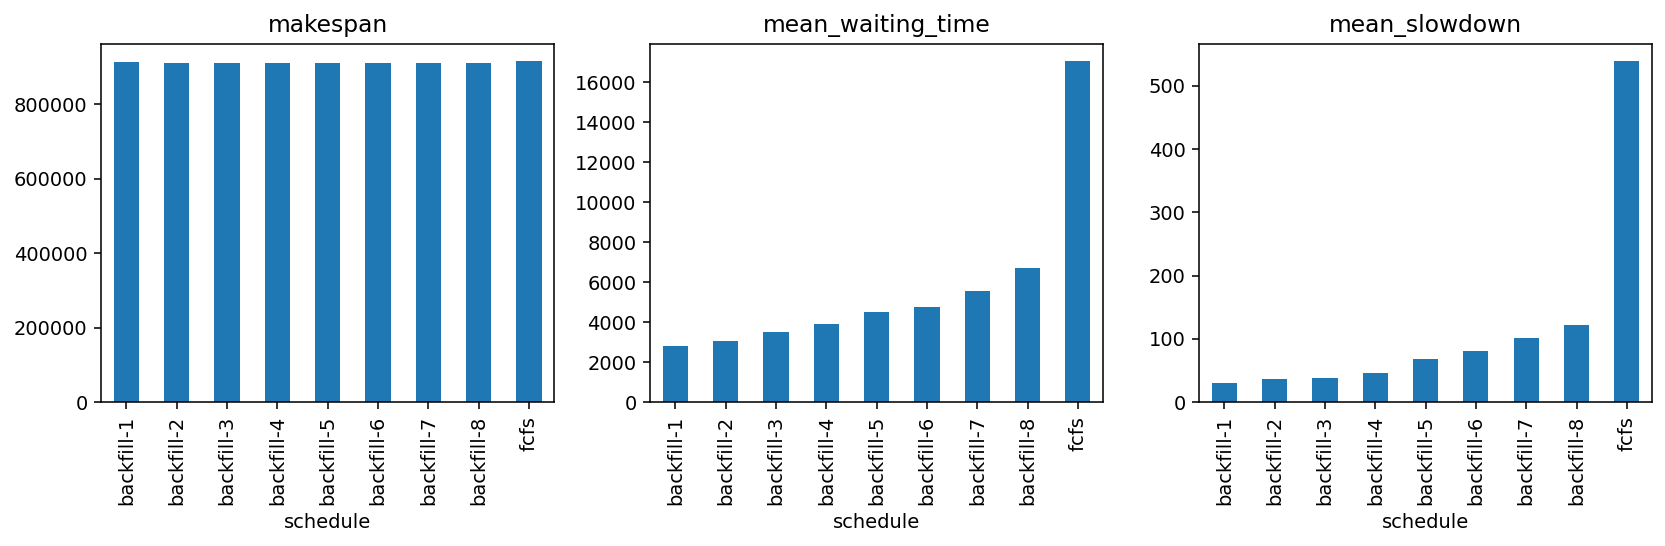

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), dpi=140)
metrics['makespan'].plot.bar(title='makespan', ax=axes[0])
metrics['mean_waiting_time'].plot.bar(title='mean_waiting_time', ax=axes[1])
metrics['mean_slowdown'].plot.bar(title='mean_slowdown', ax=axes[2])
fig.tight_layout()

In [8]:
jobsets = {}
for file in jobs_files:
    name = os.path.basename(file).split('_')[0]
    print(name)
    jobsets[name] = JobSet.from_csv(file)

backfill-1
backfill-2
backfill-3
backfill-4
backfill-5
backfill-6
backfill-7
backfill-8
fcfs


In [9]:
diff_schedules = ['fcfs', 'backfill-1']

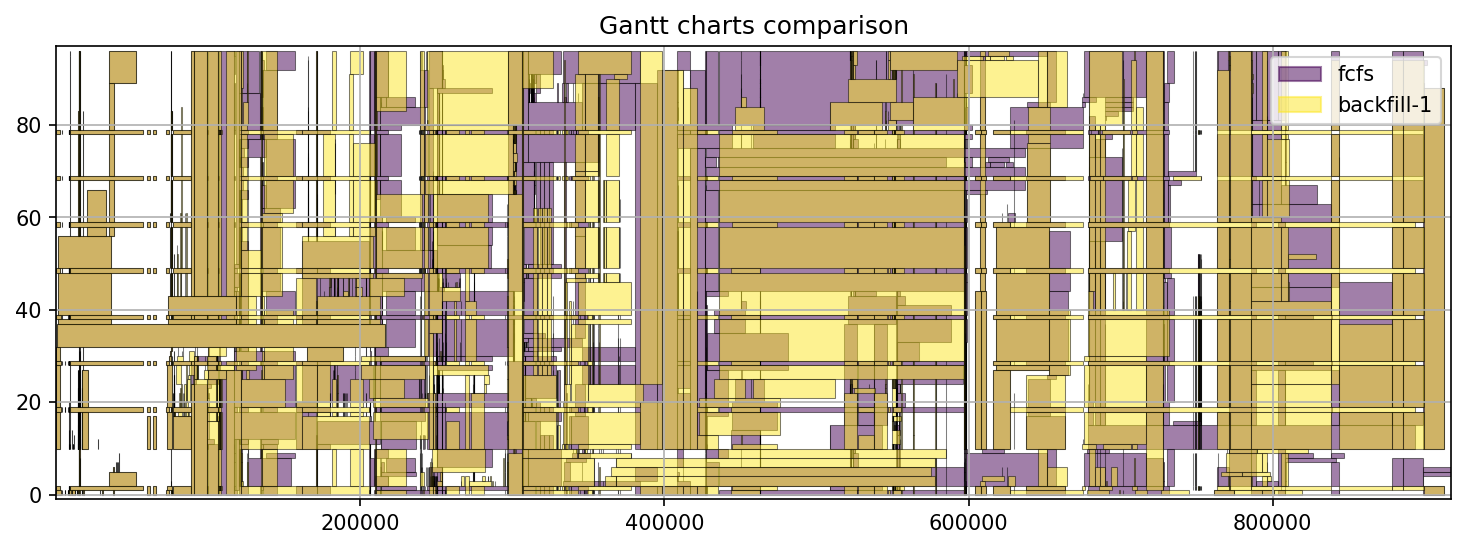

In [10]:
diff_jobsets = {schedule: jobsets[schedule] for schedule in diff_schedules}
matplotlib.rcParams['figure.figsize'] = 12,4
matplotlib.rcParams['figure.dpi']= 150
visu.gantt.plot_diff_gantt(diff_jobsets)

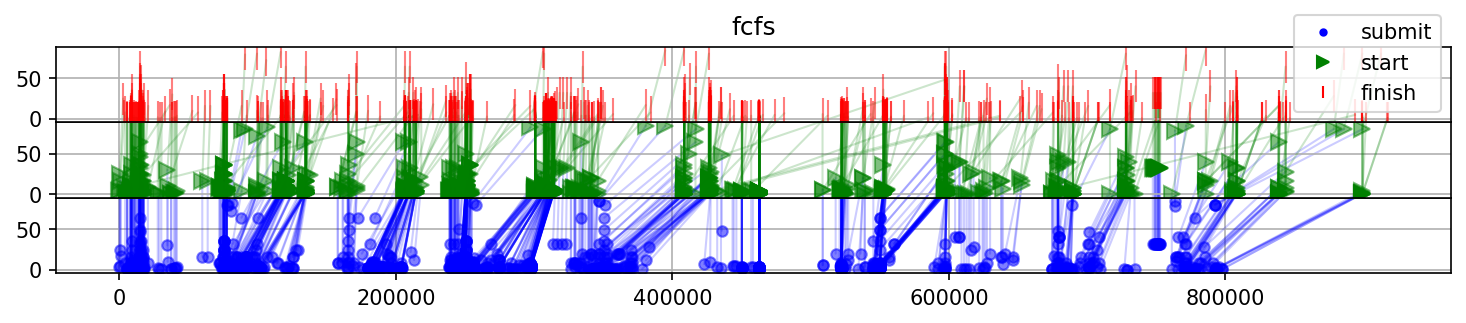

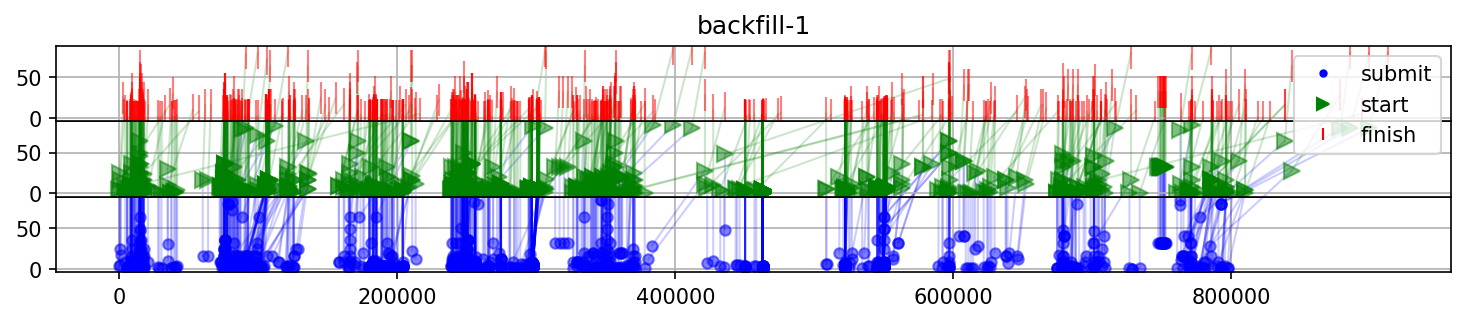

In [11]:
matplotlib.rcParams['figure.figsize'] = 12, 2
matplotlib.rcParams['figure.dpi']= 150
visu.lifecycle.plot_lifecycle(jobsets[diff_schedules[0]], title=diff_schedules[0])
visu.lifecycle.plot_lifecycle(jobsets[diff_schedules[1]], title=diff_schedules[1])